# Proyek Predictive Analysis

- **Nama:** Alisha Anggranidi Salsabila
- **Email:** anggranidi@gmail.com
- **ID Dicoding:** MC012D5X2354



## Data Understanding

Mengimpor library yang diperlukan untuk seluruh proyek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

## Data Loading

Mengunduh dataset dari kaggle: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data

In [2]:
file_path = 'apartments_for_rent_classified_100K.csv'

df = pd.read_csv(file_path, nrows=25000, encoding='latin-1', sep=';')
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5509007130,housing/rent/apartment,"Great Central Location Two BR, Two BA",s new! An amazing transformation is buildings ...,"AC,Basketball,Cable or Satellite,Dishwasher,Gy...",2.0,2.0,USD,No,Thumbnail,...,"$1,299",Monthly,1033,NaN,Cincinnati,OH,39.1819,-84.4195,RentDigs.com,1568766994
24996,5509007093,housing/rent/apartment,Over 815 sf in Bellevue,We believe elevating where you live is about b...,"Fireplace,Gym,Internet Access",1.0,1.0,USD,No,Thumbnail,...,"$2,060",Monthly,815,NaN,Bellevue,WA,47.6156,-122.2109,RentDigs.com,1568766991
24997,5509007068,housing/rent/apartment,"Gorgeous Loveland, One BR, One BA","Square footage: 822 sq-ft, unit number: 106. W...","AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",1.0,1.0,USD,No,Thumbnail,...,"$1,293",Monthly,822,NaN,Loveland,CO,40.4269,-105.0931,RentDigs.com,1568766989
24998,5509007025,housing/rent/apartment,"Located in beautiful Greenville, Texas. Parkin...","Summerwind Apartments offers spacious, one and...","Fireplace,Parking,Washer Dryer",1.0,2.0,USD,No,Yes,...,$930,Monthly,930,NaN,Greenville,TX,33.0713,-96.0882,RentDigs.com,1568766986


Dataset tersebut berisi 25.000 baris dan 22 kolom.

## Variable Description

Penjelasan setiap kolom:
1. **id** : Identifikasi unik untuk listing apartemen
2. **category** : Kategori dari iklan apartemen
3. **title** : Nama apartemen
4. **body** : Deskripsi atau informasi tambahan tentang apartemen
5. **amenities** : Fasilitas yang disediakan, seperti AC, lapangan basket, kabel TV, gym, akses internet, kolam renang, lemari es, dll.
6. **bathrooms** : Jumlah kamar mandi yang tersedia
7. **bedrooms** : Jumlah kamar tidur yang tersedia
8. **currency** : Mata uang yang digunakan untuk harga apartemen
9. **fee** : Biaya tambahan yang mungkin dikenakan
10. **has_photo** : Menunjukkan apakah apartemen memiliki foto
11. **pets_allowed** : Jenis hewan peliharaan yang diizinkan, seperti anjing/kucing, dll.
12. **price** : Harga sewa apartemen
13. **price_display** : Harga yang ditampilkan untuk pembaca
14. **price_type** : Harga yang tertera dalam USD
15. **square_feet** : Ukuran atau luas apartemen dalam satuan kaki persegi
16. **address** : Alamat lokasi apartemen
17. **cityname** : Nama kota tempat apartemen berada
18. **state** : Nama provinsi tempat apartemen berada
19. **latitude** : Koordinat lintang lokasi apartemen
20. **longitude** : Koordinat bujur lokasi apartemen
21. **source** : Sumber iklan apartemen
22. **time** : Waktu saat iklan dibuat

****
Show info dari dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25000 non-null  int64  
 1   category       25000 non-null  object 
 2   title          25000 non-null  object 
 3   body           25000 non-null  object 
 4   amenities      20222 non-null  object 
 5   bathrooms      24963 non-null  float64
 6   bedrooms       24980 non-null  float64
 7   currency       25000 non-null  object 
 8   fee            25000 non-null  object 
 9   has_photo      25000 non-null  object 
 10  pets_allowed   11761 non-null  object 
 11  price          24999 non-null  float64
 12  price_display  24999 non-null  object 
 13  price_type     25000 non-null  object 
 14  square_feet    25000 non-null  int64  
 15  address        6680 non-null   object 
 16  cityname       24923 non-null  object 
 17  state          24923 non-null  object 
 18  latitu

Dataset ini terdiri dari 25.000 baris dan 22 kolom dengan 4 kolom bertipe float64, 4 kolom bertipe int64, dan 14 kolom bertipe object. Beberapa kolom memiliki nilai Null. Kolom *price* merupakan kolom target.

In [4]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,2.500000e+04,24963.000000,24980.000000,24999.000000,25000.000000,24990.000000,24990.000000,2.500000e+04
mean,5.554762e+09,1.410928,1.726341,1540.282051,946.409080,37.891161,-91.655027,1.571216e+09
std,7.150835e+07,0.566034,0.804758,997.089042,486.306474,4.801917,16.476094,3.829783e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.508904e+09,1.000000,1.000000,1010.500000,700.000000,34.025000,-103.212100,1.568761e+09
50%,5.509106e+09,1.000000,2.000000,1350.000000,868.000000,38.957700,-84.552900,1.568774e+09
75%,5.664572e+09,2.000000,2.000000,1785.000000,1101.000000,40.759100,-77.119000,1.577015e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-68.778800,1.577362e+09


## Handling Missing Values and Outliers


Show fitur/kolom mana saja yang memiliki nilai NaN/Null.

In [5]:
#cek kolom yang memiliki value NULL
columns_with_nan = df.columns[df.isnull().any()].tolist()

#DataFrame show kolom yang terdapat nilai NULL dan tipe datanya
nan_info = pd.DataFrame({
    'Data Type': df[columns_with_nan].dtypes,
    'Null Count': df[columns_with_nan].isnull().sum(),
})

print("Kolom yang memiliki nilai NULL dan tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai NULL dan tipe datanya:
              Data Type  Null Count
amenities        object        4778
bathrooms       float64          37
bedrooms        float64          20
pets_allowed     object       13239
price           float64           1
price_display    object           1
address          object       18320
cityname         object          77
state            object          77
latitude        float64          10
longitude       float64          10


Hasil dari kode di atas menunjukkan bahwa:

* Terdapat kolom dengan tipe numeric yang memiliki nilai Null.

* Terdapat kolom dengan tipe object yang memiliki nilai Null.

* Kolom amenities, pets_allowed, dan address memiliki jumlah missing value yang signifikan.

*****
Terdapat 2 cara untuk mengatasi missing values:
1. Drop Missing Values
2. Imputasi (Pengisian Missing Values)

Pada proyek ini, kolom dengan jumlah Null kurang dari 100 akan dihapus (drop), sementara kolom dengan jumlah Null lebih dari 100 akan diimputasi.

In [6]:
#duplikasi dataset
df_clean = df.copy()
#drop kolom yang terdapat nilai NULL kurang dari 100
df_clean = df_clean.dropna(subset=['bathrooms','bedrooms','cityname','state','latitude','longitude' ])

Ada 3 kolom yang memiliki lebih dari 100 nilai Null, yaitu amenities, pets_allowed, dan address. Imputasi dilakukan dengan nilai "not provided" karena tidak bisa dipastikan bahwa tidak ada fasilitas, tidak ada izin hewan peliharaan, atau tidak ada alamat.


In [7]:
df_clean['amenities'].fillna('not provided', inplace=True)
df_clean['pets_allowed'].fillna('not provided', inplace=True)
df_clean['address'].fillna('not provided', inplace=True)

<ipython-input-7-dcaacdf95747>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['amenities'].fillna('not provided', inplace=True)
<ipython-input-7-dcaacdf95747>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [8]:
#verifikasi dataset
columns_with_nan = df_clean.columns[df_clean.isnull().any()].tolist()
nan_info = pd.DataFrame({
    'Data Type': df_clean[columns_with_nan].dtypes,
    'Null Count': df_clean[columns_with_nan].isnull().sum(),
})
print("Kolom yang memiliki nilai NULL dan tipe datanya:")
print(nan_info)
print("Jumlah dataset yang sudah di update", df_clean.shape)

Kolom yang memiliki nilai NULL dan tipe datanya:
              Data Type  Null Count
price           float64           1
price_display    object           1
Jumlah dataset yang sudah di update (24867, 22)


Show kolom dengan tipe data numerik

In [9]:
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
print("Kolom dengan tipe data numerik:")
print(numeric_columns)

Kolom dengan tipe data numerik:
Index(['id', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude', 'time'],
      dtype='object')


Hasil dari kode di atas menunjukkan bahwa:

* Terdapat 8 kolom dengan tipe data numerik.

* Kolom id, latitude, longitude, dan time tidak akan diperiksa untuk outlier.

* Kolom id, latitude, longitude, dan time memiliki karakteristik dan fungsi yang berbeda dari kolom numerik pada umumnya yang dianalisis untuk outlier. Oleh karena itu, pengecekan outlier pada kolom-kolom tersebut tidak diperlukan.

Membuat visualisasi untuk outliers dengan boxplot

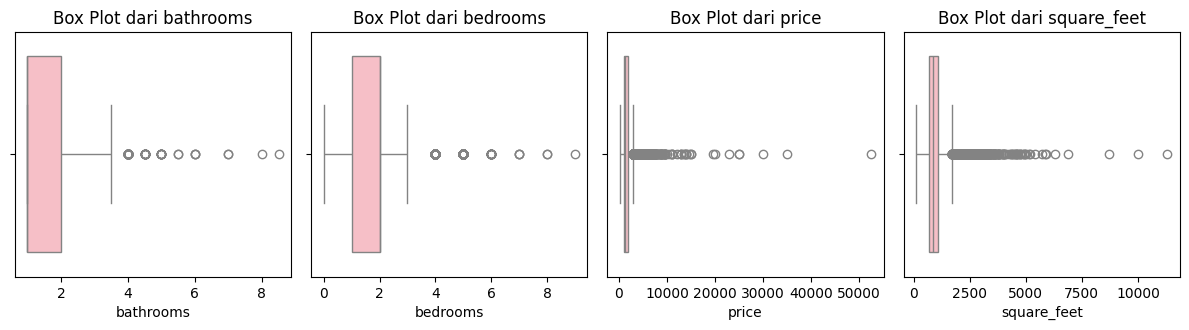

In [10]:
numeric_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet']
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x = df_clean[column], color='#FFB6C1')
    plt.title(f'Box Plot dari {column}')
plt.tight_layout()
plt.show()

Hasil dari kode di atas menunjukkan bahwa beberapa fitur numerik yang dianalisis mengandung outliers.

Handling Outlier dengan IQR

In [11]:
def remove_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet']
for column in numeric_columns:
    df_clean = remove_outliers_iqr(df_clean, column)
    print(f"Outliers removed from {column}")
df_clean.shape

Outliers removed from bathrooms
Outliers removed from bedrooms
Outliers removed from price
Outliers removed from square_feet


(22501, 22)

****
Dataset telah dibersihkan dan total sampel menjadi 22.501 baris

## Univariate Analysis

Split dataset menjadi 2, yatu categorical dan numerical

* Fitur yang tidak relevan (seperti id, latitude, longitude, dan time) tidak dianalisis.

* Fitur dengan nilai unik terlalu banyak (seperti title, body, amenities, dan address) tidak dianalisis.

* Fitur dengan nilai mirip (seperti price_display dengan price) tidak diambil.

* Fitur currency dan fee tidak dianalisis karena memiliki nilai yang sama di seluruh dataset.

In [12]:
categorical_features = ['category', 'has_photo', 'pets_allowed', 'price_type', 'cityname', 'state', 'source']
numerical_features = ['bathrooms', 'bedrooms', 'price', 'square_feet']

Analisis terhadap kategori

In [13]:
#hitung jumlah sampel

def analyze_and_plot_categorical(df, categorical_features, n=3,m=2):
  count = df[categorical_features].value_counts()
  percent = 100 * df[categorical_features].value_counts(normalize=True)
  df_analysis = pd.DataFrame({'Count': count, 'Percent': percent.round(1)})
  print(df_analysis)

  plt.figure(figsize=(n,m))
  count.plot(kind='bar', title=categorical_features, color='#FFB6C1')
  plt.xlabel(categorical_features)
  plt.ylabel('Count')
  plt.show()

                         Count  Percent
category                               
housing/rent/apartment   22497    100.0
housing/rent/home            2      0.0
housing/rent/short_term      1      0.0
housing/rent                 1      0.0


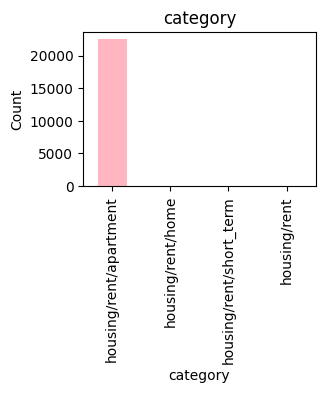

In [14]:
#analisis fitur kategori
analyze_and_plot_categorical(df_clean, 'category')

Hasil dari kode di atas adalah:
* Terdapat 4 kategori data, yaitu housing/rent/apartment, housing/rent/home, housing/rent/short_term, dan housing/rent.
* Kategori housing/rent/home dan housing/rent/short_term memiliki jumlah yang sangat kecil, yaitu masing-masing 2 dan 1 entri.
* Melakukan drop terhadap value yang sangat sedikit

           Count  Percent
has_photo                
Thumbnail  12237     54.4
Yes         8506     37.8
No          1758      7.8


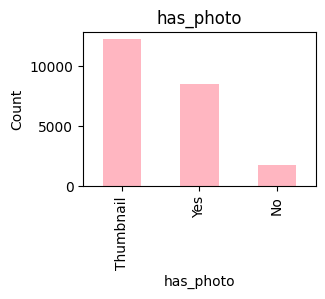

In [15]:
#analisis fitur has_photo
analyze_and_plot_categorical(df_clean, 'has_photo')

Hasil dari kode di atas menunjukkan bahwa ada 3 kategori, yaitu thumbnail, yes, dan no. Kategori dengan jumlah terbanyak adalah thumbnail

              Count  Percent
pets_allowed                
not provided  11870     52.8
Cats,Dogs      9885     43.9
Cats            687      3.1
Dogs             59      0.3


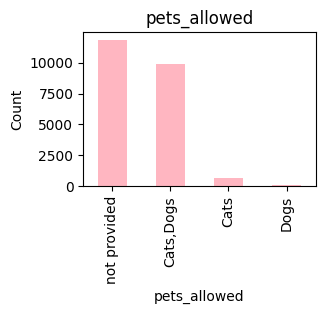

In [16]:
#analisis fitur pets_allowed
analyze_and_plot_categorical(df_clean, 'pets_allowed')

Hasil dari kode di atas menunjukkan:
* terdapat 4 kategori, yaitu "Cats, Dogs," "Not provided," "Cats," dan "Dogs"
* Kategori dengan jumlah terbanyak adalah "Not provided," diikuti oleh kategori "Cats, Dogs" sebagai kategori terbanyak kedua

            Count  Percent
price_type                
Monthly     22500    100.0
Weekly          1      0.0


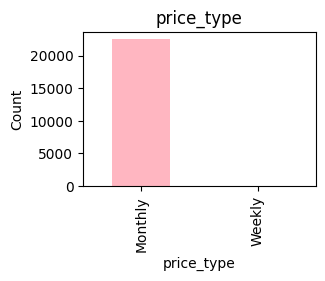

In [17]:
#analisis fitur price_type
analyze_and_plot_categorical(df_clean, 'price_type')

Hasil dari kode di atas menunjukkan bahwa ada dua kategori, yaitu "monthly" dan "weekly." Kategori "weekly" memiliki jumlah yang sangat sedikit, sehingga dapat dihapus

       Count  Percent
state                
TX      3279     14.6
MD      1968      8.7
NC      1691      7.5
NJ      1681      7.5
CO      1549      6.9
CA      1404      6.2
WA      1388      6.2
OH      1358      6.0
GA      1148      5.1
VA       811      3.6
MA       755      3.4
FL       681      3.0
NV       507      2.3
OK       426      1.9
PA       399      1.8
NH       388      1.7
CT       280      1.2
WI       278      1.2
IL       248      1.1
MO       222      1.0
MN       212      0.9
IN       202      0.9
IA       171      0.8
OR       166      0.7
MI       149      0.7
AZ       108      0.5
ND       102      0.5
LA        99      0.4
NE        99      0.4
TN        79      0.4
KS        71      0.3
UT        66      0.3
SD        61      0.3
DC        60      0.3
NY        59      0.3
SC        52      0.2
VT        45      0.2
AR        42      0.2
AK        42      0.2
AL        39      0.2
KY        37      0.2
ID        18      0.1
NM        14      0.1
ME        

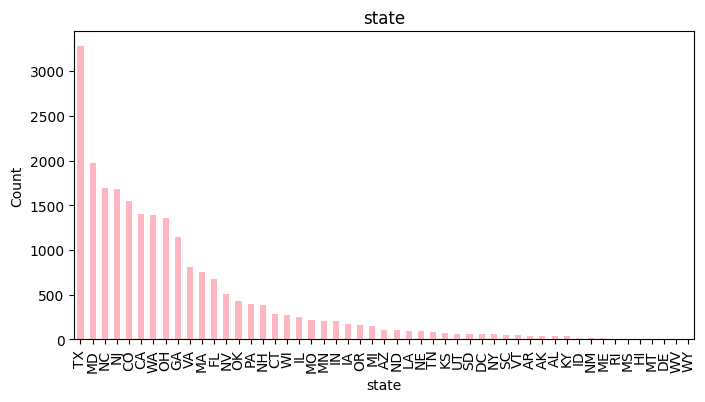

In [18]:
#analisis fitur state
analyze_and_plot_categorical(df_clean, 'state',8,4)

In [19]:
#hitung jumlah negara atau state
num_unique_values = df_clean['state'].nunique()
print("Jumlah nilai unik dalam kolom 'state':", num_unique_values)

Jumlah nilai unik dalam kolom 'state': 51


Hasil dari kode di atas menunjukkan bahwa terdapat 51 negara bagian yang berbeda dan negara bagian dengan jumlah sampel terbanyak adalah TX

                   Count  Percent
source                           
RentDigs.com       16458     73.1
RentLingo           5743     25.5
ListedBuy            163      0.7
RealRentals           70      0.3
GoSection8            32      0.1
Listanza              16      0.1
RENTOCULAR            13      0.1
rentbits               2      0.0
RENTCafé               1      0.0
tenantcloud            1      0.0
Real Estate Agent      1      0.0
Home Rentals           1      0.0


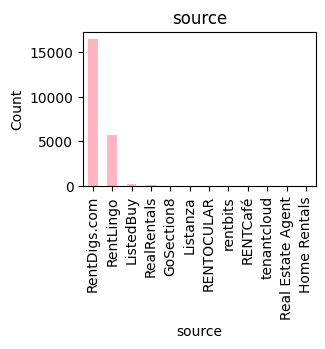

In [20]:
#analisis fitur source
analyze_and_plot_categorical(df_clean, 'source')

Hasil dari kode di atas menunjukkan bahwa terdapat 12 kategori berbeda, dengan kategori "RentDigs.com" memiliki jumlah terbanyak. Kategori "Real Estate Agent" dan "Home Rentals" masing-masing memiliki 1 entri, yang dapat dihapus karena jumlahnya sangat kecil

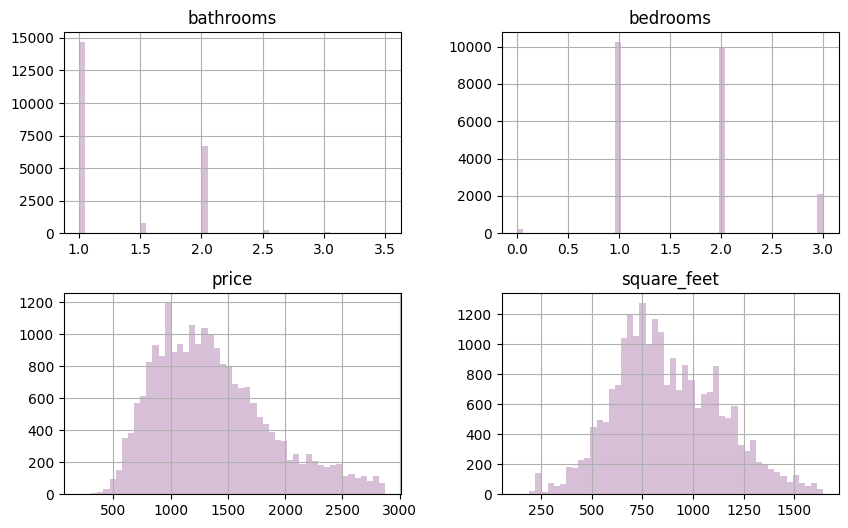

In [21]:
#show histogram fitur numerik
df_clean[numerical_features].hist(bins=50, figsize=(10, 6), color='#D8BFD8')
plt.show()

Hasil dari kode di atas memberikan informasi sebagai berikut:

1. Kamar Mandi (Bathrooms):
* Mayoritas properti memiliki 1 kamar mandi, dengan beberapa properti memiliki 1.5 dan 2.5 kamar mandi.
* Kamar mandi seharusnya tidak dalam format float, sehingga entri dengan nilai kamar mandi pecahan akan dihapus (drop).

2. Kamar Tidur (Bedrooms):
* Mayoritas properti memiliki 1 atau 2 kamar tidur.

3. Harga Sewa (Price):
* Harga sewa apartemen tersebar dengan puncak di sekitar 700-1000 USD.
* Distribusi harga menunjukkan pola normal dengan sedikit skew ke kanan.

4. Luas (Square Feet):
* Luas apartemen bervariasi dengan puncak sekitar 500-800 kaki persegi.
* Distribusi luas juga menunjukkan pola normal dengan skew ke kanan.

Berdasarkan analisis univariat, ditemukan beberapa sampel yang akan dihapus

In [22]:
#show jumlah baris dan kolom sebelum dilakukan drop
df_clean.shape

(22501, 22)

In [23]:
#delete sampel berdasarkan hasil analisis univariates
df_clean = df_clean[~df_clean['category'].isin(['housing/rent/home', 'housing/rent/short_term'])]
df_clean = df_clean[df_clean['price_type'] != 'Weekly']
df_clean = df_clean[df_clean['source'] != 'FALSE']
df_clean = df_clean[df_clean['bathrooms'] % 1 == 0]

In [24]:
#show jumlah baris dan kolom setelah dilakukan drop
df_clean.shape

(21473, 22)

****
Hasil dari kode di atas menunjukkan bahwa setelah dilakukan pembersihan lebih lanjut, total data yang tersedia menjadi 21473

In [25]:
#show kolom yang memiliki satu nilai unik setelah drop
single_value_column = [col for col in df_clean.columns if df_clean[col].nunique() == 1]
print("Jumlah kolom yang memiliki nilai unik:")
print(single_value_column)

Jumlah kolom yang memiliki nilai unik:
['category', 'currency', 'fee', 'price_type']


## Multivariate Analysis

show plot fitur categorical terhadapa prcie

<ipython-input-26-304b99779766>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_clean, palette="pastel")


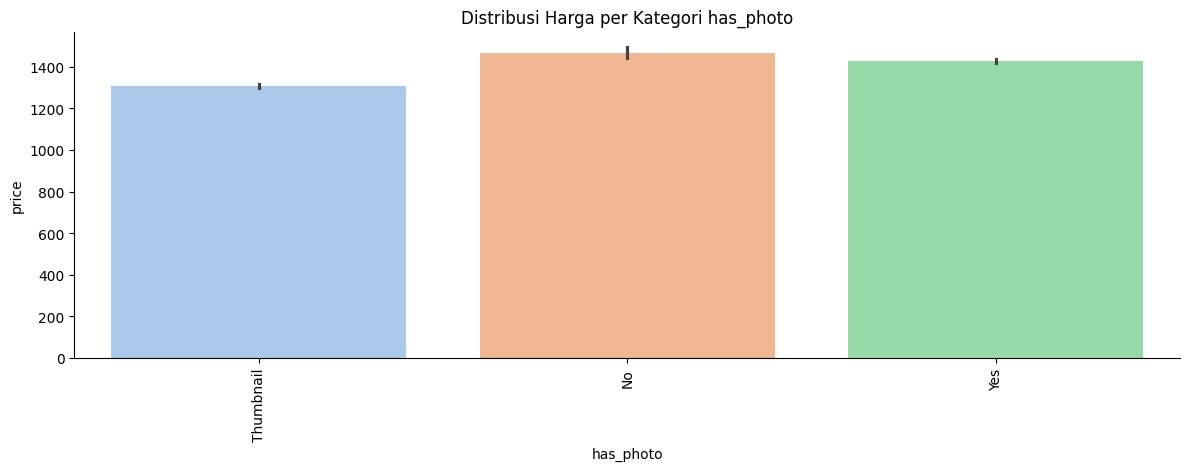

<ipython-input-26-304b99779766>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_clean, palette="pastel")


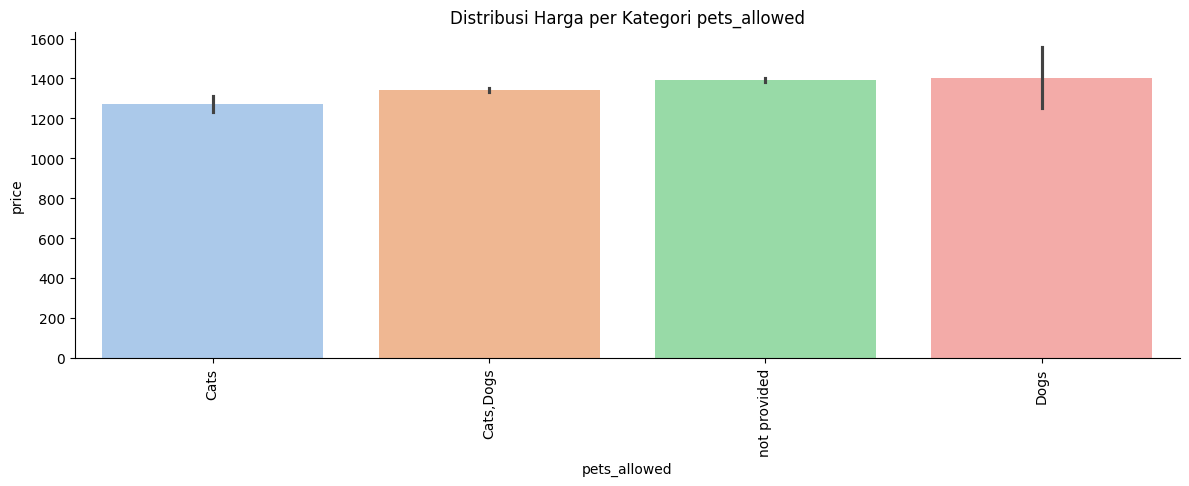

<ipython-input-26-304b99779766>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_clean, palette="pastel")


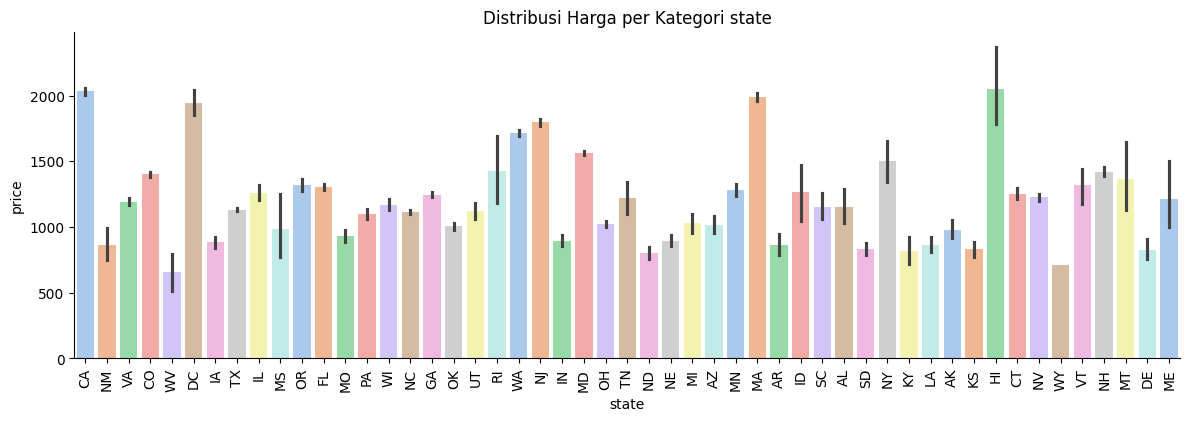

<ipython-input-26-304b99779766>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_clean, palette="pastel")


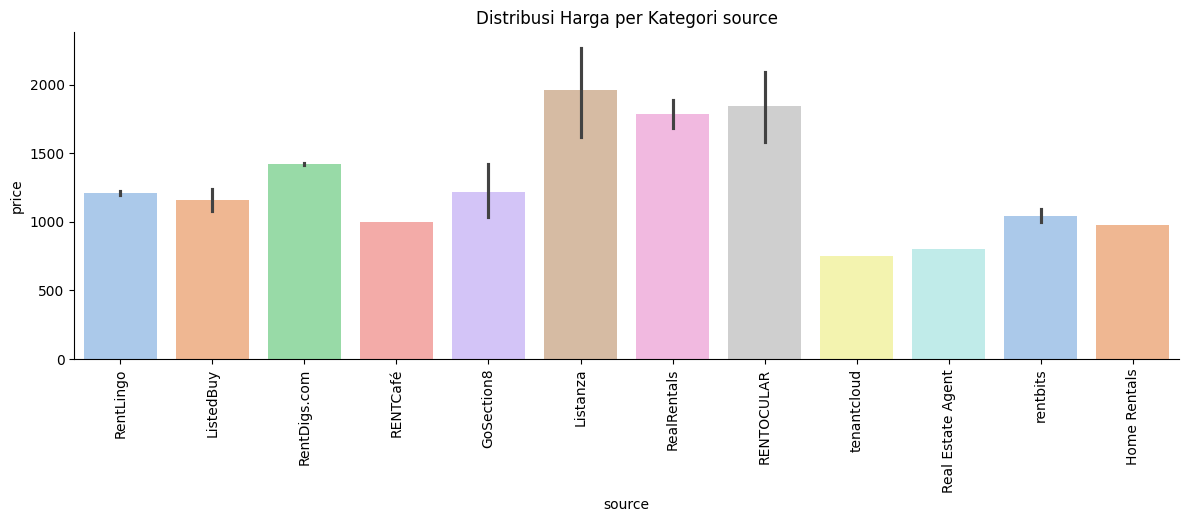

In [26]:
categorical_features = ['has_photo', 'pets_allowed', 'state', 'source']
for col in categorical_features:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_clean, palette="pastel")
    plt.title("Distribusi Harga per Kategori {}".format(col))
    plt.xticks(rotation=90)
    plt.show()

Hasil dari kode di atas menunjukkan bahwa hampir semua fitur memiliki pengaruh yang serupa terhadap harga

****
show plot antar fitur numerik

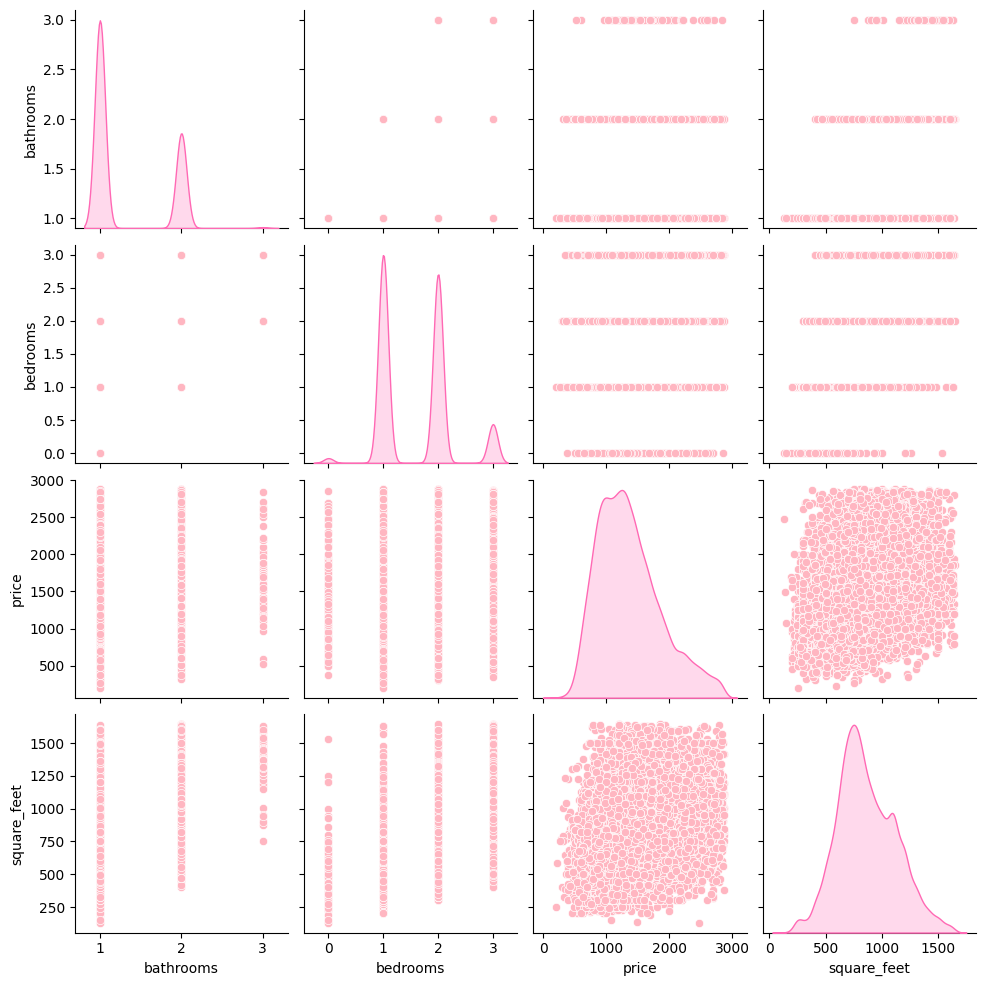

In [27]:
numerical_features = ['bathrooms','bedrooms','price','square_feet']
sns.pairplot(df_clean[numerical_features], diag_kind='kde',
             plot_kws={'color': '#FFB6C1'},
             diag_kws={'color': '#FF69B4'})
plt.show()

Text(0.5, 1.0, 'Heatmap Korelasi Fitur Numerik')

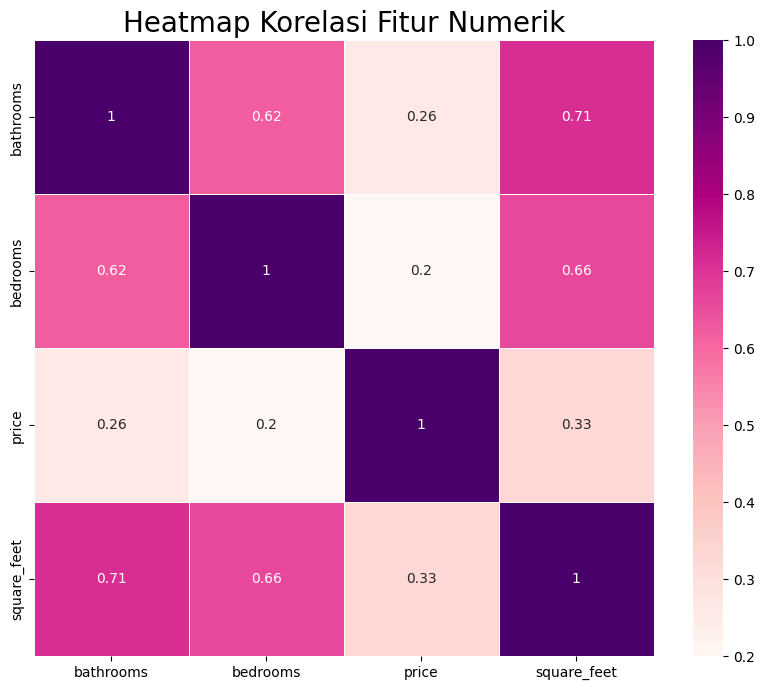

In [28]:
# show heatmap korelasi fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5, )
plt.title("Heatmap Korelasi Fitur Numerik", size=20)

Berdasarkan heatmap korelasi tersebut, berikut adalah informasi yang didapat:

1. Hubungan antara Luas Bangunan dan Fitur Lain: Fitur square_feet (luas bangunan) menunjukkan hubungan yang cukup kuat dengan bathrooms dan bedrooms, yang menunjukkan bahwa luas bangunan dapat menjadi indikator penting dalam menentukan ukuran dan fasilitas apartemen.

2. Harga Sewa: Korelasi antara harga sewa (price) dan fitur lainnya (kamar mandi dan kamar tidur) relatif rendah. Ini menunjukkan bahwa harga sewa mungkin dipengaruhi oleh faktor-faktor lain seperti lokasi, fasilitas tambahan, atau kondisi pasar yang tidak tercakup dalam fitur yang dianalisis.

## Data Preparation

Pada bagian ini, kita akan melalui empat tahap persiapan data, yaitu:

1. Menghapus fitur yang tidak memberikan kontribusi signifikan.
2. Melakukan encoding pada fitur kategori.
3. Membagi dataset menggunakan fungsi train_test_split dari library sklearn.
4. Melakukan standarisasi pada data.

Fitur-fitur yang dihapus karena tidak memberikan kontribusi untuk analisis atau model prediksi meliputi:

* id (Tidak memberikan kontribusi)
* category (Nilainya seragam di seluruh dataset)
* title (Tidak memberikan kontribusi)
* body (Tidak memberikan kontribusi)
* currency (Nilainya seragam di seluruh dataset)
* fee (Nilainya seragam di seluruh dataset)
* price_display (Memiliki nilai yang sama dengan fitur price)
* price_type (Nilainya seragam di seluruh dataset)
* address (Tidak memberikan kontribusi)
* latitude (Tidak memberikan kontribusi)
* longitude (Tidak memberikan kontribusi)
* time (Tidak memberikan kontribusi)

In [29]:
#drop kolom
features_to_drop = ['id', 'title', 'category', 'body', 'currency', 'fee', 'price_display','price_type','address','latitude','longitude','time']
df_clean = df_clean.drop(features_to_drop, axis=1)

In [30]:
#show dataset setelah drop fitur
df_clean.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source
0,not provided,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA,RentLingo
3,not provided,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA,RentLingo
4,not provided,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM,RentLingo
6,not provided,2.0,2.0,Thumbnail,not provided,1600.0,1120,Hampton,VA,RentLingo
7,not provided,2.0,2.0,Thumbnail,"Cats,Dogs",1300.0,947,Lakewood,CO,RentLingo


Hasil dari kode di atas menunjukkan bahwa terdapat 10 fitur yang tersisa dari total 22 fitur

In [31]:
# mengubah fitur kategorikal menjadi numerik dengan one-hot-encoding
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['amenities'], prefix='amenities')], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['has_photo'], prefix='has_photo')], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['pets_allowed'], prefix='pets_allowed')], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['cityname'], prefix='cityname')], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['state'], prefix='state')], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['source'], prefix='source')], axis=1)

df_clean.drop(['amenities', 'has_photo', 'pets_allowed','cityname', 'state', 'source'], axis=1, inplace=True)
df_clean.head()

,bathrooms,bedrooms,price,square_feet,amenities_AC,"amenities_AC,Alarm,Basketball,Dishwasher,Gym,Patio/Deck,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Elevator,Garbage Disposal,Gated,Gym,Hot Tub,Patio/Deck,Pool,Refrigerator,Washer Dryer,Wood Floors","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Parking,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer",...,source_Listanza,source_ListedBuy,source_RENTCafé,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
0,1.0,1.0,2195.0,542,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,2.0,1600.0,820,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1.0,1.0,975.0,624,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,2.0,2.0,1600.0,1120,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,2.0,2.0,1300.0,947,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Hasil dari kode di atas menunjukkan bahwa proses one-hot encoding telah berhasil, namun nilai yang dihasilkan masih dalam bentuk True dan False. Nilai-nilai tersebut perlu diubah menjadi format numerik

In [32]:
#merubah nilai true dan false menjadi 1 dan 0
df_clean = df_clean.astype(int)
df_clean.head(1)

,bathrooms,bedrooms,price,square_feet,amenities_AC,"amenities_AC,Alarm,Basketball,Dishwasher,Gym,Patio/Deck,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Elevator,Garbage Disposal,Gated,Gym,Hot Tub,Patio/Deck,Pool,Refrigerator,Washer Dryer,Wood Floors","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Parking,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer","amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Gym,Internet Access,Patio/Deck,Refrigerator,Storage,Tennis,Washer Dryer",...,source_Listanza,source_ListedBuy,source_RENTCafé,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
0,1,1,2195,542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Membagi dataset menjadi fitur dan target, di mana target adalah fitur harga (price). Split dataset menjadi 80:20

In [33]:
#kolom target
x = df_clean.drop('price', axis=1)
y = df_clean['price']
#split data menjadi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

#show sampel dari setiap bagian
print("Data training dan testing telah dibagi")
print(f'Jumlah # dari keseluruhan dataset: {len(x)}')
print(f'Jumlah # dari train dataset: {len(x_train)}')
print(f'Jumlah # dari test dataset: {len(x_test)}')

Data training dan testing telah dibagi
Jumlah # dari keseluruhan dataset: 21473
Jumlah # dari train dataset: 17178
Jumlah # dari test dataset: 4295


Standarisasi

In [34]:
#melakukan standarisasi pada fitur numerik dalam data latih (train)
numerical_features = ['bathrooms', 'bedrooms', 'square_feet']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,bathrooms,bedrooms,square_feet
18926,-0.671769,-0.89555,-1.129446
12897,1.442881,0.61429,0.916462
19160,-0.671769,-0.89555,-1.106108
21377,1.442881,0.61429,1.320976
14783,-0.671769,-0.89555,-1.285028


In [35]:
#cek standarisasi terhadap nilai mean = 0 dan std = 1
x_train[numerical_features].describe().round(4)

,bathrooms,bedrooms,square_feet
count,17178.0000,17178.0000,17178.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-0.6718,-2.4054,-2.8409
25%,-0.6718,-0.8956,-0.6938
50%,-0.6718,0.6143,-0.1376
75%,1.4429,0.6143,0.7064
max,3.5575,2.1241,3.0441


## Model

Pada tahap ini, kita akan membangun model machine learning menggunakan tiga algoritma, yaitu:
* K-Nearest Neighbor
* Random Forest
* Boosting Algorithm

In [36]:
#dataframe untuk masing-masing model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

#KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

#Ranfos
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

#boosting
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)


## Evaluation

In [37]:
#standarisasi terhadap fitur numerical untuk data test
numerical_features = ['bathrooms','bedrooms','square_feet']
scaler = StandardScaler()
scaler.fit(x_test[numerical_features])
x_test[numerical_features] = scaler.transform(x_test.loc[:, numerical_features])
x_test[numerical_features].head()

,bathrooms,bedrooms,square_feet
11428,-0.686975,-0.900155,-0.248796
730,-0.686975,-0.900155,0.253445
22687,1.440320,0.608298,1.119907
21419,-0.686975,-0.900155,-0.405986
16745,-0.686975,-0.900155,-0.613016


In [38]:
#show mse untuk masing-masing model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

#Print mse
mse


,train,test
KNN,64.430654,82.02668
RF,56.269007,80.098912
Boosting,171.35363,172.069614


Visualisasi

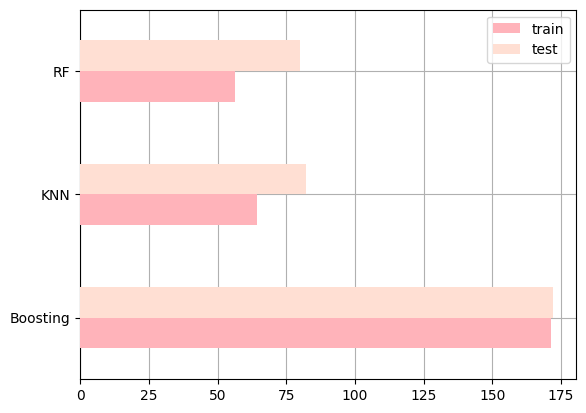

In [39]:
#plot metrik dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['#FFB3BA', '#FFDFD3'])
ax.grid(zorder=0)

Hasil dari kode di atas menunjukkan bahwa model Random Forest memberikan nilai error terkecil, sedangkan model Boosting menghasilkan nilai error terbesar

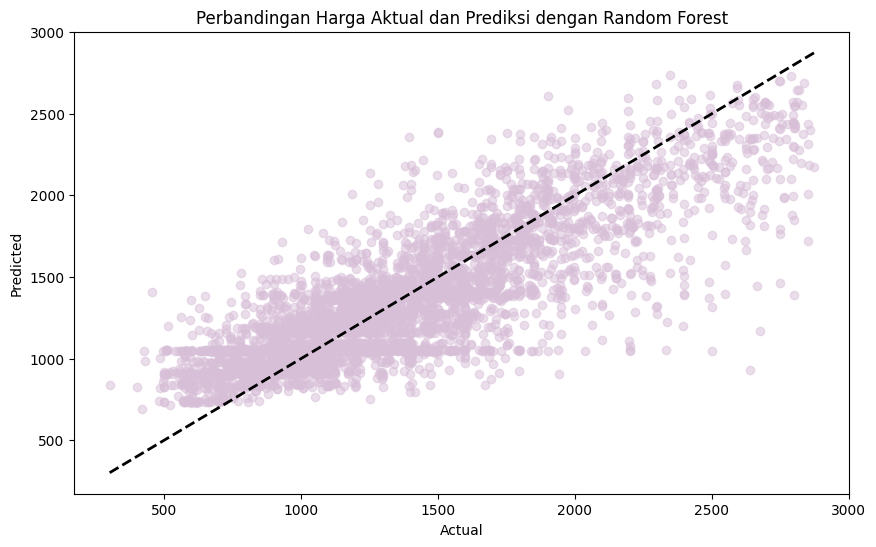

In [40]:
# visualisasi mse yang paling kecil yaitu random forest
train_mse = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)
test_mse = mean_squared_error(y_pred=RF.predict(x_test), y_true=y_test)

#nilai mse dalam Dataframe untuk visualisasi
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['RandomForest'])
models.loc['train_mse', 'RandomForest'] = train_mse
models.loc['test_mse', 'RandomForest'] = test_mse

y_pred = RF.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='thistle')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Perbandingan Harga Aktual dan Prediksi dengan Random Forest')
plt.show()